## Priprava podatkov, osnovne statistike in vizualizacija

Podatkovno rudarjenje, naloga, 14. 3. 2025
**Gašper Dobrovoljc**

Neizogiben del vsakega projekta na področju podatkovnega rudarjenja je iskanje,
urejanje in priprava podatkov. V tej nalogi boste spoznali primer podatkovne
zbirke in uporabili postopke za pretvorbo podatkov v ustrezno obliko ter pregled in
prikaz osnovnih statistik.

### Podatki

V nalogi boste pregledali in pripravili podatke gledanosti Hollywoodskih filmov
zbirke [MovieLens](https://grouplens.org/datasets/movielens/) v obdobju **1995-2016**.

Iste podatke boste uporabili v vseh nalogah, zato jih dodobra spoznajte. Gre za podatkovno zbirko za
vrednotenje priporočilnih sistemov, ki vsebuje gledalce ter njihove ocene za posamezni film na lestvici 1 do 5. 
Poleg osnovne matrike uporabnikov in ocen vsebuje še dodatne podatke o filmih (npr. žanr, datum, oznake,
igralci).

Podatki so v mapi `./podatki/ml-latest-small`. Podatkovna zbirka vsebuje naslednje datoteke:

* ratings.csv: podatki o uporabnikih in ocenah,
* movies.csv: podatki o žanrih filmov,
* cast.csv: podatki o igralcih,
* tags.csv: podatki o oznakah (ang. \emph{tags}),
* links.csv: povezave na sorodne podatkovne zbirke.


Pred pričetkom reševanja naloge si dobro oglejte podatke in datoteko **README.txt**. Podrobnosti o zbirki lahko preberete na [spletni strani](http://files.grouplens.org/datasets/movielens/ml-latest-small-README.html).

Pripravite metode za nalaganje podatkov v ustrezne podatkovne strukture. Te vam bodo prišle
prav tudi pri nadaljnjih nalogah.
Bodite pozorni na velikost podatkov.

Zapišite kodo za branje datotek in pripravo ustreznih matrik (in drugih struktur) podatkov, ki jih boste uporabi pri odgovarjanju na spodnja vprašanja.

Kodo lahko razdelite v več celic.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

ratings = pd.read_csv('./podatki/ml-latest-small/ratings.csv')
movies = pd.read_csv('./podatki/ml-latest-small/movies.csv')
cast = pd.read_csv('./podatki/ml-latest-small/cast.csv')

ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')

### Vprašanja

Glavni namen podatkovnega rudarjenja je *odkrivanje znanj iz podatkov*,
torej odgovarjanje na vprašanja z uporabo računskih postopkov.

Z uporabo principov, ki ste jih spoznali na vajah in predavanjih, odgovorite na
spodnja vprašanja. Pri vsakem vprašanju dobro premislite, na kakšen način boste
najbolje podali, prikazali oz. utemeljili odgovor. Bistven del so odgovori na
vprašanja in ne implementacija vaše rešitve.

#### 1. vprašanje (15%):
Kateri filmi so v povprečju najbolje ocenjeni?  Pripravite seznam
filmov ter njihovih povprečnih ocen in izpišite 10 filmov z vrha seznama.
Opazite pri takem ocenjevanju kakšno težavo? Kako bi jo lahko rešili? Kakšni so
rezultati tedaj?

Kodo lahko razdelite v več celic.

In [2]:
average_ratings = ratings.groupby(['movieId'])['rating'].mean().reset_index()

sorted_ratings = average_ratings.sort_values(by='rating', ascending=False)

sorted_ratings.merge(movies, on='movieId').head(10)

movieId  rating                                              title  \
0   163949     5.0  The Beatles: Eight Days a Week - The Touring Y...   
1    71180     5.0                               Padre padrone (1977)   
2    51471     5.0                               Amazing Grace (2006)   
3    52617     5.0       Woman on the Beach (Haebyeonui yeoin) (2006)   
4    53887     5.0                                O Lucky Man! (1973)   
5    54251     5.0                                Dorian Blues (2004)   
6    54328     5.0           My Best Friend (Mon meilleur ami) (2006)   
7    55555     5.0  Edge of Heaven, The (Auf der anderen Seite) (2...   
8    56869     5.0                  Drained (O cheiro do Ralo) (2006)   
9    57038     5.0  To the Left of the Father (Lavoura Arcaica) (2...   

                         genres  
0                   Documentary  
1                         Drama  
2                 Drama|Romance  
3                  Comedy|Drama  
4  Comedy|Drama|Fantasy|Musical  
5                        Comedy  
6                        Comedy  
7                         Drama  
8                        Comedy  
9                         Drama

Odgovor: **Izpisani so filmi z oceno 5.0, ki imajo zelo malo ocen. To lahko rešimo s filtrom, ki ne upošteva filmov s premalo ocenami. Po uporabi filtra so filmi, ki so izpisani dobro poznani.**

In [3]:
minimum_ratings = 50

ratings_count = ratings.groupby('movieId')['rating'].count().reset_index()

popular_ratings = ratings_count[ratings_count['rating'] >= minimum_ratings]

filtered_ratings = ratings[ratings['movieId'].isin(popular_ratings['movieId'])]

average_ratings = filtered_ratings.groupby(['movieId'])['rating'].mean().reset_index()

sorted_ratings = average_ratings.sort_values(by='rating', ascending=False)

sorted_ratings.merge(movies, on='movieId').head(10)

movieId    rating                             title  \
0      858  4.487500             Godfather, The (1972)   
1      318  4.487138  Shawshank Redemption, The (1994)   
2      969  4.420000         African Queen, The (1951)   
3      913  4.387097        Maltese Falcon, The (1941)   
4     1221  4.385185    Godfather: Part II, The (1974)   
5       50  4.370647        Usual Suspects, The (1995)   
6     1228  4.350000                Raging Bull (1980)   
7     1252  4.335526                  Chinatown (1974)   
8      904  4.315217                Rear Window (1954)   
9     1203  4.304054               12 Angry Men (1957)   

                             genres  
0                       Crime|Drama  
1                       Crime|Drama  
2      Adventure|Comedy|Romance|War  
3                 Film-Noir|Mystery  
4                       Crime|Drama  
5            Crime|Mystery|Thriller  
6                             Drama  
7  Crime|Film-Noir|Mystery|Thriller  
8                  Mystery|Thriller  
9                             Drama

#### 2. vprašanje (15%):
Posamezni film pripada enemu ali več žanrom. 
Koliko je vseh žanrov? Prikaži porazdelitev žanrov z uporabo ustrezne
vizualizacije.

Kodo lahko razdelite v več celic.

<Axes: title={'center': 'Porazdelitev žanrov filmov'}, xlabel='Žanr', ylabel='Število filmov'>

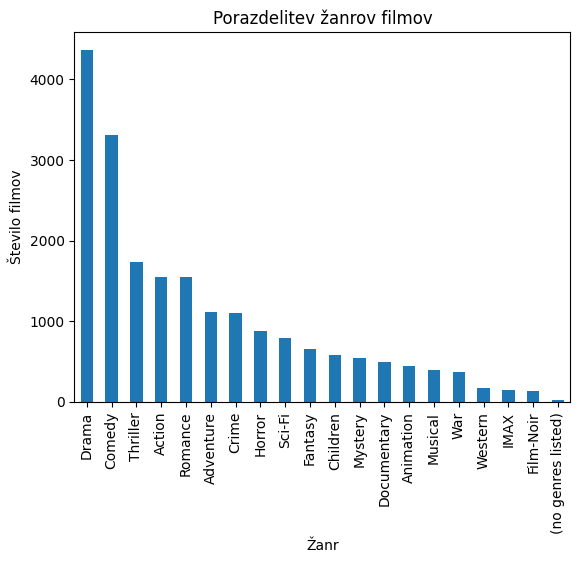

In [4]:
genres = movies['genres'].str.split('|').explode()
genre_counts = genres.value_counts()

genre_counts.plot.bar(
    title='Porazdelitev žanrov filmov',
    xlabel='Žanr',
    ylabel='Število filmov',
)

Odgovor: **Vseh žanrov je 19.**

#### 3. vprašanje (20%):
Število ocen (ogledov) se za posamezni film razlikuje. Ali
obstaja povezava med gledanostjo in povprečno oceno filma? Opišite postopek, ki
ste ga uporabili pri odgovarjanju na vprašanje.

Kodo lahko razdelite v več celic.

Korelacija med številom ocen in povprečno oceno je 0.13082726621823262


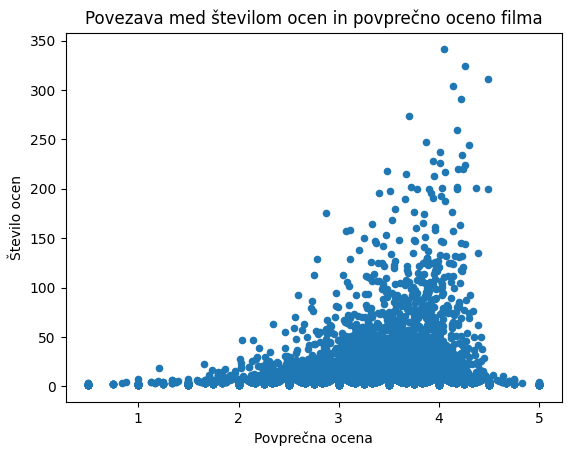

In [5]:
average_ratings = ratings.groupby('movieId').agg(
    count=('movieId', 'count'),
    rating=('rating', 'mean'),
)

average_ratings.plot.scatter(
    'rating', 'count',
    title='Povezava med številom ocen in povprečno oceno filma',
    xlabel='Povprečna ocena',
    ylabel='Število ocen',
)

correlation = average_ratings['count'].corr(average_ratings['rating'])

print(f'Korelacija med številom ocen in povprečno oceno je {correlation}')

Odgovor: **Povezava med gledanostjo in povprečno oceno je zelo šibka. Pri odgovoru sem izračunal Pearsonovo korelacijo med številom ocen in povprečno oceno.**

#### 4. vprašanje (30%):
Vsaka ocena je bila vnešena na določen datum (stolpec
*timestamp*).  Ali se popularnost posameznih filmov s časom spreminja?
Problem reši tako, da za dani film ocene razporediš po času ter v vsaku časovni
točki izračunaš povprečje za zadnjih 30, 50, ali 100 ocen. Nariši graf, kako se
ocena spreminja in ga prikaži za dva zanimiva primera filmov.

Kodo lahko razdelite v več celic.

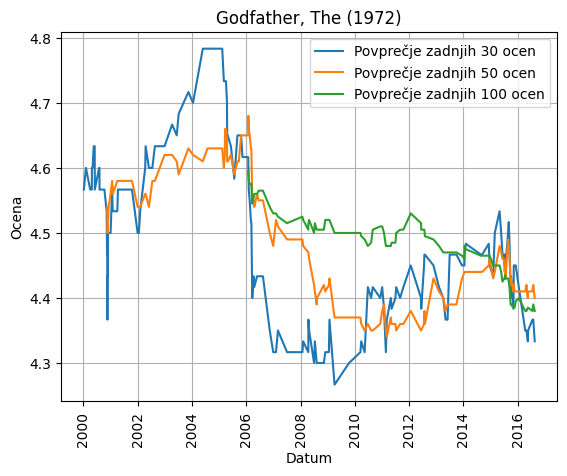

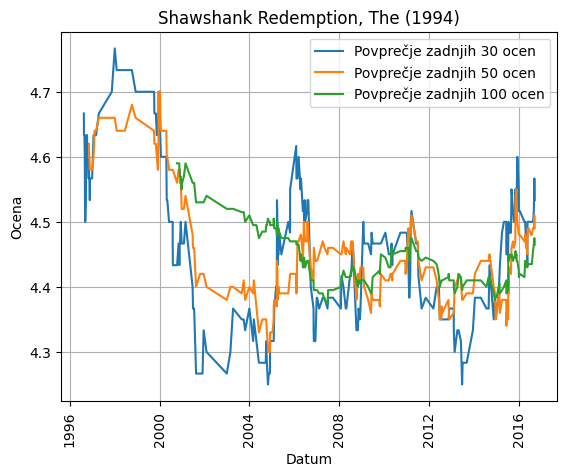

In [6]:
window_sizes = [30, 50, 100]

def rating_history(movie_id):
    movie_ratings = ratings[ratings['movieId'] == movie_id].sort_values(by='timestamp')

    for window in window_sizes:
        plt.plot(
            movie_ratings['timestamp'],
            movie_ratings['rating'].rolling(window=window).mean(),
            label=f'Povprečje zadnjih {window} ocen',
        )

    plt.title(movies[movies['movieId'] == movie_id]['title'].values[0])
    plt.xlabel('Datum')
    plt.xticks(rotation=90)
    plt.ylabel('Ocena')
    plt.grid(True)
    plt.legend()
    plt.show()

rating_history(858)
rating_history(318)

Odgovor: **Da, popularnost filmov se s časom spreminja, kar lahko vidimo pri filmu Godfather, ki mu popularnost pade in nato spet nekoliko naraste. Prav tako je zanimiv film Shawshank Redemption, ki mu ocena pade iz 4.7 in ostane približno 4.4.**

#### 5. vprašanje (20%):
Kako bi ocenili popularnost posameznih igralcev? Opišite postopek
ocenitve ter izpišite 10 najbolj popularnih igralcev.

Kodo lahko razdelite v več celic.

In [7]:
split_cast = cast.copy()

split_cast['cast'] = split_cast['cast'].str.strip('|').str.split('|')

movie_ratings = ratings.groupby(['movieId'])['rating'].mean().reset_index()

cast_ratings = split_cast.explode('cast').merge(movie_ratings, on='movieId')

actor_popularity = cast_ratings.groupby('cast').agg(
    movie_count=('movieId', 'nunique'),
    rating=('rating', 'mean'),
).reset_index()

actor_popularity['score'] = actor_popularity['movie_count'] * actor_popularity['rating']

actor_popularity.sort_values(by='score', ascending=False).head(10)

cast  movie_count    rating       score
44934      Robert De Niro           66  3.340872  220.497546
36804       Michael Caine           56  3.313227  185.540725
38514      Morgan Freeman           54  3.311041  178.796198
7007         Bruce Willis           56  3.071296  171.992554
9661   Christopher Walken           51  3.201777  163.290608
49726       Steve Buscemi           49  3.306117  161.999727
5528          Bill Murray           47  3.290502  154.653596
44278     Richard Jenkins           50  3.088702  154.435119
52217           Tom Hanks           45  3.382483  152.211715
1004         Alec Baldwin           47  3.192583  150.051396

Odgovor: **Popularnost posameznih igralcev bi ocenil s številom filmov, v katerih so igrali pomnoženo s povprečno oceno teh filmov.**

#### Bonus vprašanje (5%):

Kateri je tvoj najljubši film? Zakaj?

Odgovor: **Moj najljubši film je Kako izuriti svojega zmaja. Ima zelo dobro zgodbo, ki jo spremlja izjemna glasbena podlaga in animacija.**